In [10]:
!pip install pyvista > /dev/null

In [11]:
%matplotlib inline
from pyvista import set_plot_theme
set_plot_theme('document')

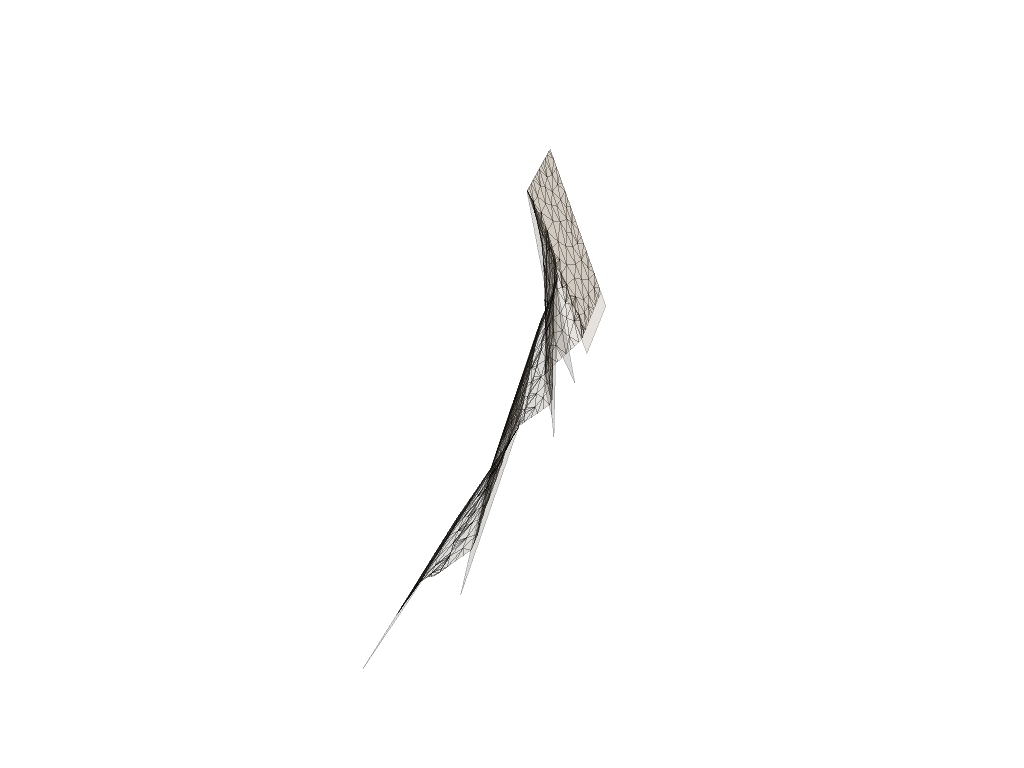

In [12]:
import pyvista as pv
f0 = "./tmp/lo-res/Wellington_Hutt_Valley_A.vtk"
f1 = "./tmp/lo-res/Wellington_Hutt_Valley_B.vtk"
f2 = "./tmp/lo-res/Wellington_Hutt_Valley_C.vtk"
f3 = "./tmp/lo-res/Wellington_Hutt_Valley_D.vtk"
f4 = "./tmp/lo-res/Wellington_Hutt_Valley_E.vtk"

mesh1 = pv.read(f0)
for f in [f1,f2,f3,f4]:
    mesh1 += pv.read(f)

h0 = "tmp/hi-res/Wellington_Hutt_Valley_1.vtk"
h1 = "tmp/hi-res/Wellington_Hutt_Valley_2.vtk"
h2 = "tmp/hi-res/Wellington_Hutt_Valley_3.vtk"
h3 = "tmp/hi-res/Wellington_Hutt_Valley_4.vtk"
h4 = "tmp/hi-res/Wellington_Hutt_Valley_5.vtk"

mesh2 = pv.read(h0)
for f in [h1,h2,h3,h4]:
    mesh2 += pv.read(f)

mesh = mesh1 + mesh2    
    
# cpos = [(107000.0, 68.5, 204.0), (128000.0, 86.5, 223.5), (0.45, 0.36, -0.8)]
cpos = mesh.plot(opacity=0.2, color=True, show_edges=True)

In [13]:
from eq_fault_geom import faultmeshio
tsurf1 = faultmeshio.tsurf("./data/CFM/tsurf/Wellington_Hutt_Valley_1.ts")
tsurf2 = faultmeshio.tsurf("./data/CFM/tsurf/Wellington_Hutt_Valley_2.ts")
tsurf3 = faultmeshio.tsurf("./data/CFM/tsurf/Wellington_Hutt_Valley_3.ts")
tsurf4 = faultmeshio.tsurf("./data/CFM/tsurf/Wellington_Hutt_Valley_4.ts")
tsurf5 = faultmeshio.tsurf("./data/CFM/tsurf/Wellington_Hutt_Valley_5.ts")

In [14]:
import ipyvolume as ipv

In [28]:
fig = ipv.figure()
m1 = ipv.plot_trisurf(x=tsurf1.x, y=tsurf1.y, z=tsurf1.z, lines=tsurf1.mesh.cells[0].data)
m2 = ipv.plot_trisurf(x=tsurf2.x, y=tsurf2.y, z=tsurf2.z, lines=tsurf2.mesh.cells[0].data)
m3 = ipv.plot_trisurf(x=tsurf3.x, y=tsurf3.y, z=tsurf3.z, lines=tsurf3.mesh.cells[0].data)
m4 = ipv.plot_trisurf(x=tsurf4.x, y=tsurf4.y, z=tsurf4.z, lines=tsurf4.mesh.cells[0].data)
m5 = ipv.plot_trisurf(x=tsurf5.x, y=tsurf5.y, z=tsurf5.z, lines=tsurf5.mesh.cells[0].data)

# faces = ipv.plot_trisurf(x, y, z, triangles=[[]], color='red')
ipv.ylim( min(m1.y.min(), m5.y.min()), max(m1.y.max(), m5.y.max()))
ipv.xlim( min(m1.x.min(), m5.x.min()), max(m1.x.max(), m5.x.max()))
# ipv.zlim( min(m1.z.min(), m5.z.min()), max(m1.z.max(), m5.z.max())) #figure out how to set this !
ipv.zlim( -40e3, 0) #figure out how to set this !

In [29]:
# h0 = "tmp/lo-res/Wellington_Hutt_Valley_A.vtk"
# mesh3 = pv.read(h0)
points = mesh1.points.transpose()
x = points[0]
y = points[1]
z = points[2]

In [30]:
# import pyvista.utilities as pvu
def quad_indices(mesh):
    for i in range(0, mesh.n_cells *5, 5):
        yield mesh.cells[i+1:i+5]

def quad_to_tri(q):
    yield (q[0], q[1], q[2])
    yield (q[0], q[2], q[3])

def tri_indices(mesh):
    for quad in quad_indices(mesh):
        for tri in quad_to_tri(quad):
            yield tri
            

ipv.plot_trisurf(x=x, y=y, z=z, triangles=[x for x in tri_indices(mesh1)], color='lightgray')


Mesh(color=array('lightgray', dtype='<U9'), line_material=ShaderMaterial(), material=ShaderMaterial(side='Doub…

In [31]:
ipv.show()